In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import random as rdm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('Iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
df['species'], categories = pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

In [10]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [11]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

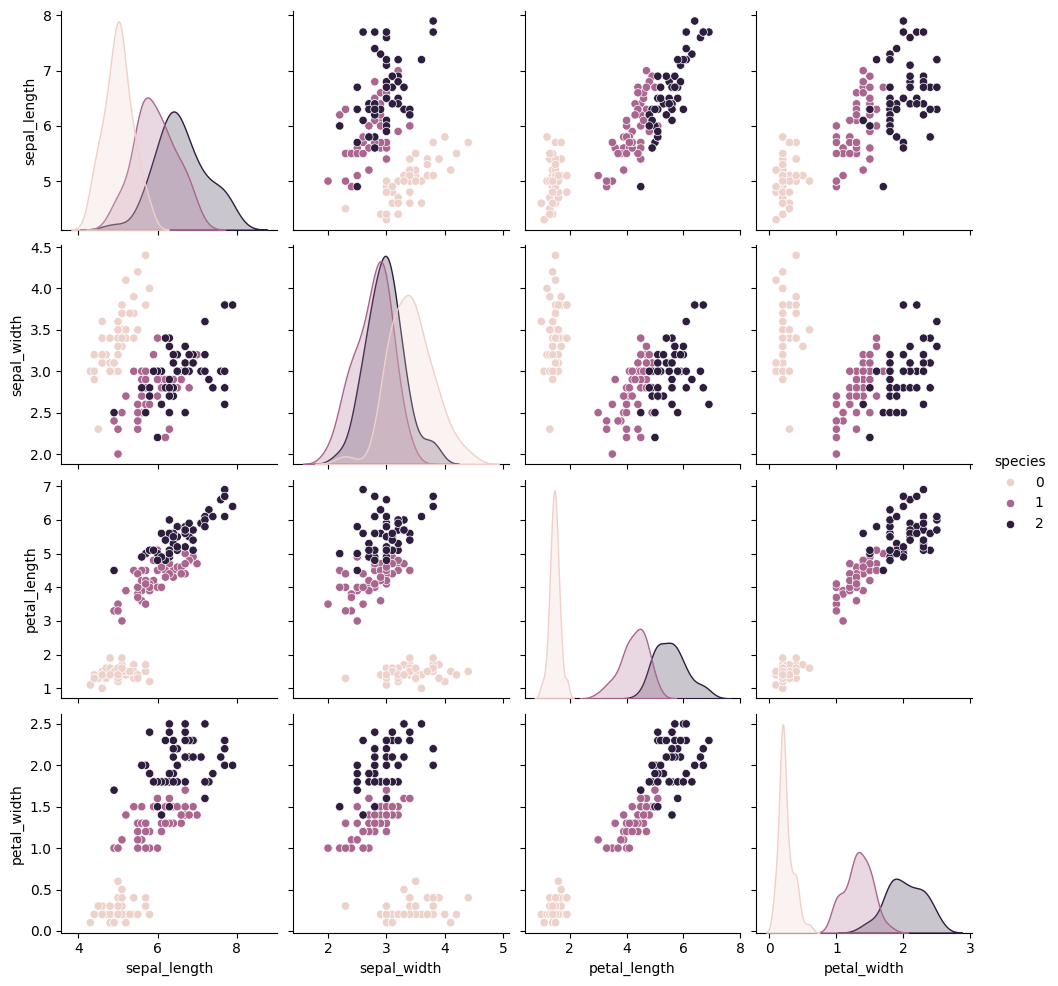

In [12]:
sns.pairplot(df, hue='species')

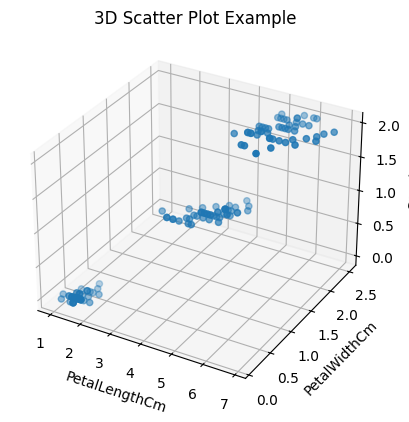

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.petal_length, df.petal_width, df.species)
ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('PetalWidthCm')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot Example')
plt.show()

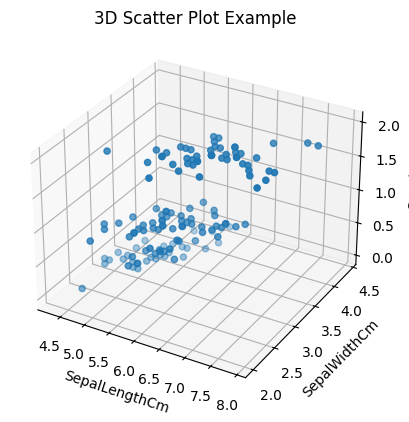

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.sepal_length, df.sepal_width, df.species)
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot Example')
plt.show()

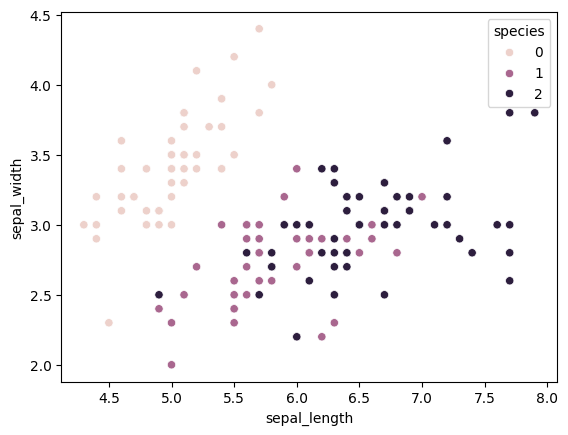

In [15]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width",hue="species");

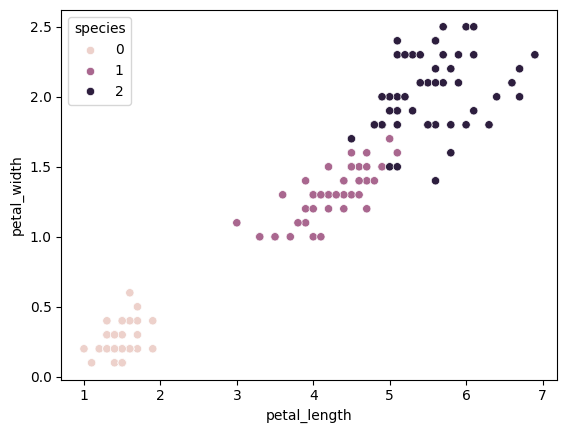

In [16]:
sns.scatterplot(data=df, x="petal_length", y="petal_width",hue="species");

In [17]:
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [18]:
len(df.columns)

5

In [19]:
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(df.columns)-1)
width = 0.25

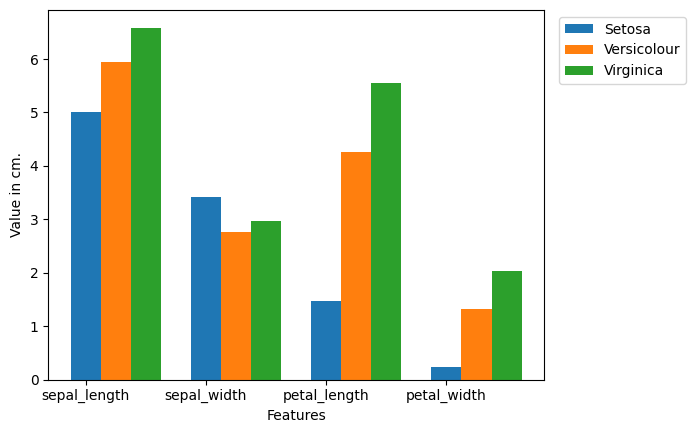

In [20]:
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, df.columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [22]:
X_train

array([[5.5, 2.4, 3.8, 1.1],
       [7.2, 3. , 5.8, 1.6],
       [6.7, 3.3, 5.7, 2.5],
       [6.6, 2.9, 4.6, 1.3],
       [7.7, 3. , 6.1, 2.3],
       [5.8, 4. , 1.2, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5.5, 2.3, 4. , 1.3],
       [4.6, 3.6, 1. , 0.2],
       [5.6, 2.8, 4.9, 2. ],
       [6.3, 3.3, 4.7, 1.6],
       [5.4, 3. , 4.5, 1.5],
       [5.6, 3. , 4.1, 1.3],
       [4.9, 2.4, 3.3, 1. ],
       [5.1, 3.4, 1.5, 0.2],
       [6.4, 3.2, 4.5, 1.5],
       [4.7, 3.2, 1.6, 0.2],
       [6.3, 3.4, 5.6, 2.4],
       [4.9, 3.1, 1.5, 0.1],
       [5.2, 4.1, 1.5, 0.1],
       [4.7, 3.2, 1.3, 0.2],
       [4.9, 2.5, 4.5, 1.7],
       [5.5, 4.2, 1.4, 0.2],
       [6.4, 2.8, 5.6, 2.2],
       [5.7, 2.9, 4.2, 1.3],
       [5.7, 2.8, 4.5, 1.3],
       [6. , 3. , 4.8, 1.8],
       [5.4, 3.4, 1.5, 0.4],
       [5.1, 3.8, 1.9, 0.4],
       [6.5, 3. , 5.8, 2.2],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 3.2, 5.9, 2.3],
       [6.3, 2.8, 5.1, 1.5],
       [5. , 2

In [23]:
y_train

array([1., 2., 2., 1., 2., 0., 0., 2., 1., 0., 2., 1., 1., 1., 1., 0., 1.,
       0., 2., 0., 0., 0., 2., 0., 2., 1., 1., 2., 0., 0., 2., 1., 2., 2.,
       1., 0., 0., 1., 1., 1., 1., 2., 2., 0., 2., 0., 1., 2., 1., 0., 0.,
       1., 2., 0., 1., 0., 2., 1., 0., 1., 2., 2., 1., 1., 2., 2., 0., 2.,
       0., 2., 2., 0., 1., 0., 0., 2., 1., 0., 0., 1., 2., 0., 2., 2., 0.,
       2., 2., 2., 2., 0., 1., 1., 1., 0., 2., 2., 0., 2., 2., 0., 0., 0.,
       0., 1., 0., 2., 2., 0., 1., 2., 0., 2., 0., 0., 0., 1., 1., 0., 1.,
       1.])

In [24]:
X_test

array([[6.3, 2.7, 4.9, 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [6. , 2.9, 4.5, 1.5],
       [6.1, 3. , 4.6, 1.4],
       [7.6, 3. , 6.6, 2.1],
       [5.7, 4.4, 1.5, 0.4],
       [7.9, 3.8, 6.4, 2. ],
       [7.7, 3.8, 6.7, 2.2],
       [6.3, 2.5, 4.9, 1.5],
       [5. , 2. , 3.5, 1. ],
       [4.3, 3. , 1.1, 0.1],
       [6.3, 3.3, 6. , 2.5],
       [6. , 2.7, 5.1, 1.6],
       [5.7, 2.8, 4.1, 1.3],
       [6.4, 2.8, 5.6, 2.1],
       [5.6, 2.9, 3.6, 1.3],
       [5.7, 2.6, 3.5, 1. ],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.5, 3.9, 1.1],
       [4.6, 3.1, 1.5, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.6, 3. , 4.5, 1.5],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.5, 1.3, 0.3],
       [6.2, 2.2, 4.5, 1.5],
       [6.8, 3. , 5.5, 2.1],
       [5.8, 2.7, 3.9, 1.2],
       [5.8, 2.6, 4. , 1.2]])

In [25]:
y_test

array([2., 2., 0., 2., 1., 1., 2., 0., 2., 2., 1., 1., 0., 2., 1., 1., 2.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 2., 1., 1.])

In [26]:
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [27]:
predictions = svn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9333333333333333

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      0.86      0.92        14
         2.0       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30



In [29]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: [0. 1. 2.]


In [30]:
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

array([0., 1., 2.])